In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

# Wranglin' –– Corraling Unruly Data
One bit at a time
=====

**Version 0.2**

By AA Miller  
2022 July 19

For this exercise you will need a five different text files. They have been compiled into a tarball that you should [download](https://arch.library.northwestern.edu/downloads/8g84mm66j?locale=en) and unpack in the same directory as this notebook. 

Webster's Dictionary$^\ast$ defines wrangler as:

**wrangler** noun

wran·gler | raŋ-g(ə-)lər

(short for horse-wrangler, probably partial translation of Mexican Spanish caballerango groom): a ranch hand who takes care of the saddle horses broadly : cowboy 

$^\ast$actually https://www.merriam-webster.com/dictionary/ - Webster's didn't define wrangler in the way I wanted

How then, as astronomers, are we all like cowhands?

Data are often like horses in that: they all differ, rarely conform to a single standard set of behavior, and they love to eat hay.$^\dagger$

$^\dagger$I made that last one up.

Thus, in our efforts to better understand the Universe, we must often manipulate, coax, and, in some cases, force our data to "behave." This involves a variety of tasks, such as: gathering, cleaning, matching, restructuring, transforming, filtering, combining, merging, verifying, and fixing data.

Here is a brief and unfortunate truth, there isn't a single person in the entire world that would organize data in *exactly* the same way that you would.

As a result, you may find that data that are useful to you are not organized in an optimal fashion for use in your workflow/software.

Hence: the need to wrangle.

There is one important and significant way in which our lives as astronomers are much better than the average data scientist: even though our data are "worthless," virtually all of it is numbers.

Furthermore, I contend that most astronomical data can easily be organized into a simple tabular structure.

Nevertheless, as you will see during the exercises, even with relatively simple, small numerical data sets there is a need for wrangling.

And wrangling brings up a lot of issues...

Consider the following data set that contains the street names for my best friends from childhood:

    ['Ewing', 'Isabella', 'Reese', 'Isabella', 
     'Thayer', 'Reese', 'Reese', 'Ewing', 'Reece']

Do you notice anything interesting?

Either my hometown has a street named "Reese"  and a street named "Reece", or the last entry was input incorrectly. 

If the later is true, then we have to raise the question of: what should we do?

For this particular data set, it would be possible to create a verification procedure to test for similar errors.

1. Collect every street name in the city (from post office?)
2. Confirm every data entry has a counterpart.

For any instances where this isn't the case, one could then intervene with a correction. 

This particular verification catches this street name error, but it doesn't correct for the possibility that the person doing the data entry may have been reading addresses really quickly and the third "Reese" entry should have actually said "Lawndale."

(verification is really hard)

Data provenance – a historical record of the data and its origins – is really really hard.

If you are making "corrections" to the data, then each and every one of those corrections should be reported (for databases this is called "logging"). Ideally, these reports would live with the data so others could understand how things have changed.

If you did change "Reece" to "Reese", anyone working with the data should be able to confirm those changes.

Suppose now you wanted to use the same street name data set to estimate which street I lived on while growing up. 

One way to mathematically approach this problem would be to convert the streets in the data set to GPS coordinates, and then to perform a KDE of the PDF for the coordinates of where I lived. 

This too is a form of wrangling, because the data you have (street names) are not the data you need (coordinates). 

Why harp on this? 

In practice, data scientists (including astronomers) spend an unreasonable amount of time manipulating and quality checking data (some indsutry experts estimate that up to 80% of their time is spent warnglin').

Today, we will work through several examples that require wrangling, while, hopefully, building some strategies to minimize the amount of time you spend on these tasks in the future.

For completeness, I will mention that there is a famous canonical paper about [data wrangling](http://vis.stanford.edu/files/2011-Wrangler-CHI.pdf), which introduces the [`Wrangler`](http://vis.stanford.edu/wrangler/), a tool specifically designed to take heterogeneous (text) data, and provide a set of suggested operations/manipulations to  create a homogenous table amenable to standard statistical analysis. 

One extremely nice property of the `Wrangler` is that it records every operation performed on the data, ensuring high-fidelity reporting on the data provenance. We should do a better job of this in astronomy.

Today, we are going to focus on `python` solutions to some specific astronomical data sets.

Hopefully you learn some tricks to make your work easier in the future.

## Problem 0) An (Incomplete) Introduction to Pandas DataFrames

**Problem 0a**

Read the SDSS data for Problem 4, stored in a csv file called `DSFP_SDSS_spec_train.csv`, into a `pandas` DataFrame called `sdss_spec`.

After yesterday spending a great deal of time describing the value of binary data storage, does the fact that I am now providing a (moderate) amount of data as a plain ascii file mean that I am a bad teacher...

*probably*

In [2]:
sdss_spec = pd.read_csv("DSFP_SDSS_spec_train.csv")
sdss_spec.head()

,specObjID,z,type,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,modelMag_u,modelMag_g,...,extinction_i,extinction_z,w1mpro,w1snr,w2mpro,w2snr,w3mpro,w3snr,w4mpro,w4snr
0,299567742770505728,0.071414,ext,20.88291,19.23907,18.56170,18.09715,17.76469,19.62189,18.03702,...,0.061267,0.045572,14.395,21.1,14.236,15.6,11.029,6.8,8.579,-0.9
1,299568017178650624,0.071380,ext,20.88291,19.23907,18.56170,18.09715,17.76469,19.62189,18.03702,...,0.061267,0.045572,14.395,21.1,14.236,15.6,11.029,6.8,8.579,-0.9
2,299566643258877952,0.088173,ext,20.84844,18.96040,18.08027,17.62953,17.31857,20.18508,18.26120,...,0.047582,0.035392,14.162,35.0,13.970,22.3,12.233,2.9,9.067,-0.3
3,299569116690278400,0.088161,ext,20.84844,18.96040,18.08027,17.62953,17.31857,20.18508,18.26120,...,0.047582,0.035392,14.162,35.0,13.970,22.3,12.233,2.9,9.067,-0.3
4,299568292056557568,0.066539,ext,21.28256,19.61427,18.98529,18.52956,18.26322,20.18081,18.47435,...,0.058709,0.043669,14.734,30.6,14.512,17.6,11.078,9.8,9.054,2.3


`pandas` provides many different methods for selecting columns from the DataFrame. Supposing you wanted `psfMag`, you could use any of the following:

    sdss_spec['psfMag_g']
    sdss_spec[['psfMag_r', 'psfMag_z']]
    sdss_spec.psfMag_g

(notice that selecting multiple columns requires a list within `[]`)

**Problem 0b**

Plot a histogram of the `psfMag_g` - `modelMag_g` distribution for the data set (which requires a selection of those two columns).

Do you notice anything interesting?

*Hint* - you may want to use more than the default number of bins (=10).

<IPython.core.display.Javascript object>


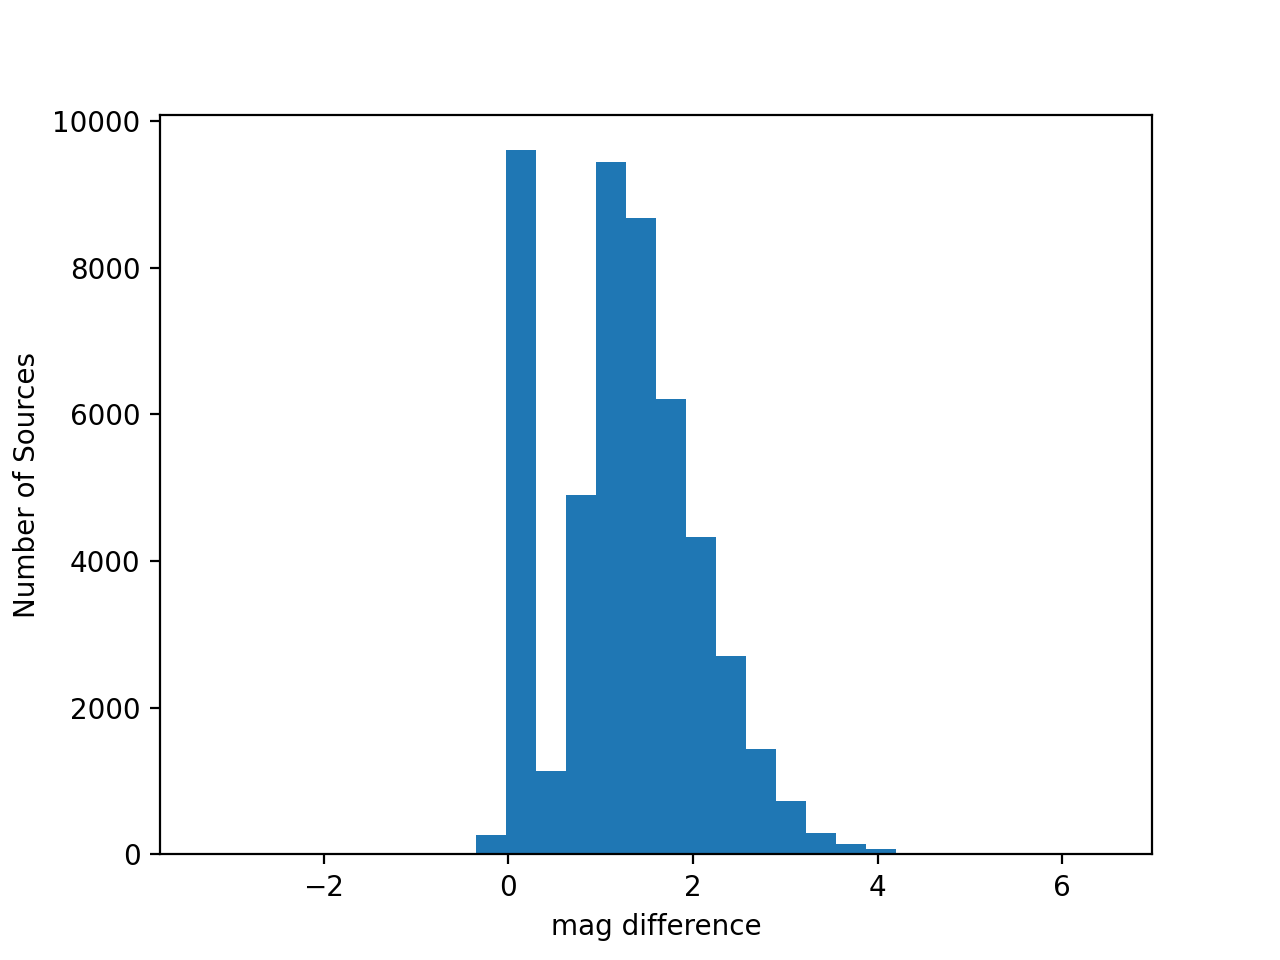

Text(0, 0.5, 'Number of Sources')

In [3]:
mag_diff = sdss_spec['psfMag_g'] - sdss_spec['modelMag_g']

plt.hist(mag_diff, bins = 30)

plt.xlabel('mag difference')
plt.ylabel('Number of Sources')

`pandas` can also be used to aggregate the results of a search.

**Problem 0c**

How many extended sources (`type` = `ext`) have `modelMag_i` between 19 and 20? Use as few lines as possible.

In [4]:
sources = (sdss_spec['type'] == 'ext') & (sdss_spec['modelMag_i'] >= 19) & (sdss_spec['modelMag_i'] <= 20)

In [5]:
len(sources[sources==True])

369

`pandas` also enables [`GROUP BY`](http://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) operations, where the data are split based on some criterion, a function is then applied to the groups, and the results are then combined back into a data structure.

**Problem 0d**

Group the data by their `type` and then report the minimum, median, and maximum redshift of each group. Can you immediately tell anything about these sources based on these results?

*Hint* - just execute the cell below.

In [6]:
grouped = sdss_spec.groupby([sdss_spec.type])
print(grouped['z'].min())
print(grouped['z'].median())
print(grouped['z'].max())

type
ext   -0.005469
ps    -0.010875
Name: z, dtype: float64
type
ext    0.107352
ps     0.000275
Name: z, dtype: float64
type
ext    6.839257
ps     6.687022
Name: z, dtype: float64


Finally, yesterday we only briefly discussed joining tables, but this is where relational databases really shine.

For this example we only have a single table, so we will exclude any examples of a `pandas` join, but there is functionality to [join or merge](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) dataframes in a fashion that is fully analogous to databases.

## Problem 1) The Sins of Our Predecessors

If at any point in your career you need to access archival infrared data, you will likely need to retrieve that information from the [NASA IPAC InfraRed Science Archive](https://irsa.ipac.caltech.edu). IRSA houses the data for every major NASA IR mission, and several ground-based missions as well (e.g., 2MASS, IRTF). Whether you are sudying brown dwarfs, explosive transients, solar system objects, star-formation, galaxy evolution, Milky Way dust and the resulting extinction of extragalactic observations, or quasars (and much more) the IR plays a critical role.

Given the importance of IR observations, it stands to reason that IRSA would provide data in a simple to read format for modern machines, such as comma separated values or FITS binary tables...

Right?...

**Right?...**

In fact, IRSA has created their own standard for storing data in a text file. The particulars of this format can be found in `irsa_catalog_WISE_iPTF14jg_search_results.tbl`, a file that is written in the standard IRSA format.

*shameless plug alert!* iPTF14jg is a [really strange star](https://arxiv.org/pdf/1901.10693.pdf) that exhibited a large outburst that we still don't totally understand. The associated data file includes [NEOWISE](https://neowise.ipac.caltech.edu/) observations of the mid-IR evolution of this outburst.

**Problem 1a**

Using `pandas` read the data in the IRSA table file into a `DataFrame` object.

*Hint 1* - you absolutely should look at the text file to develop a strategy to accomplish this goal.

*Hint 2* - you may want to manipulate the text file so that it can more easily be read by `pandas`. **If you do this** be sure to copy the file to another name as you will want to leave the original intact. 

In [7]:
header_df = pd.read_csv('./irsa_catalog_WISE_iPTF14jg_search_results.tbl', 
                   comment = '\\', delimiter = '|')

header = header_df.columns[1:-1]

data = pd.read_csv('./irsa_catalog_WISE_iPTF14jg_search_results.tbl', skiprows = 93, 
                   delim_whitespace = True, names = header)

In [8]:
data

,ra,dec,sigra,sigdec,sigradec,w1mpro,w1sigmpro,w1snr,w1rchi2,w2mpro,...,w4sigmpro_allwise,tmass_key,j_m_2mass,j_msig_2mass,h_m_2mass,h_msig_2mass,k_m_2mass,k_msig_2mass,dist,angle
0,40.125566,60.879306,0.0947,0.0936,-0.0337,13.251,0.038,28.8,0.8767,12.735,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028668,242.330013
1,40.125574,60.879297,0.0925,0.0874,-0.0397,13.241,0.036,30.0,1.2610,12.629,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048011,192.659014
2,40.125623,60.879318,0.0808,0.0794,0.0098,12.753,0.039,27.8,0.7640,11.901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079498,69.867298
3,40.125553,60.879286,0.0663,0.0608,-0.0156,12.774,0.028,38.6,1.3610,11.935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.097389,209.287467
4,40.125572,60.879280,0.0645,0.0599,-0.0223,12.840,0.028,38.7,1.5550,11.897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107707,187.006050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,40.125277,60.879341,0.1150,0.1078,-0.0397,13.511,0.041,26.2,1.2990,12.668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.542346,281.913746
133,40.125317,60.879219,0.1035,0.1091,-0.0272,13.328,0.038,28.6,1.8680,12.893,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.565899,234.448038
134,40.125625,60.879152,0.1463,0.1293,-0.0575,13.734,0.048,22.9,0.9954,13.257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.574875,172.170603
135,40.125279,60.879235,0.1174,0.1057,-0.0497,13.360,0.049,22.3,0.7856,12.729,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.592270,242.957045


That pure python solution is a bit annoying as it requires a for loop with a break, and specific knowledge about how IRSA tables handler data headers (hence the use of `linenum + 4` for `skiprows`). Alternatively, one could  manipulate the data file to read in the data.

In [9]:
# 2nd solution - YOU DON'T NEED TO DO THIS

That truly wasn't all that better - as it required a bunch of clicks/text editor edits. (There are programs such as `sed` and `awk` that could be used to execute all the necessary edits from the command line, but that too is cumbersome and somewhat like the initial all `python` solution). 

If astronomers are creating data in a "standard" format, then it ought to be easy for other astronomers to access that data.

Fortunately, in this particular case, there is an easy solution - [`astropy Tables`](http://docs.astropy.org/en/stable/table/). 

IRSA tables are so commonly used throughout the community, that the folks at `astropy` have created a convenience method for all of us to read in tables created in that particular (unusual?) format.

**Problem 1b**

Use [`Table.read()`](http://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table.read) to read in `irsa_catalog_WISE_iPTF14jg_search_results.tbl` to an `astropy Table` object.

In [10]:
from astropy.table import Table

Table.read('./irsa_catalog_WISE_iPTF14jg_search_results.tbl', format = 'ascii')

ra,dec,sigra,sigdec,sigradec,w1mpro,w1sigmpro,w1snr,w1rchi2,w2mpro,w2sigmpro,w2snr,w2rchi2,nb,na,cc_flags,ph_qual,qual_frame,mjd,allwise_cntr,w1mpro_allwise,w1sigmpro_allwise,w2mpro_allwise,w2sigmpro_allwise,w3mpro_allwise,w3sigmpro_allwise,w4mpro_allwise,w4sigmpro_allwise,tmass_key,j_m_2mass,j_msig_2mass,h_m_2mass,h_msig_2mass,k_m_2mass,k_msig_2mass,dist,angle
deg,deg,arcsec,arcsec,arcsec,mag,mag,,,mag,mag,,,,,,,,mjdate,,mag,mag,mag,mag,mag,mag,mag,mag,,mag,mag,mag,mag,mag,mag,arcsec,deg
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str4,str2,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64
40.1255655,60.8793063,0.0947,0.0936,-0.0337,13.251,0.038,28.8,0.8767,12.735,0.058,18.6,0.7135,1,0,0000,AA,10,57621.23501414,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,0.028668,242.330013
40.125574,60.879297,0.0925,0.0874,-0.0397,13.241,0.036,30.0,1.261,12.629,0.051,21.2,1.121,1,0,0000,AA,5,57621.62810604,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,0.048011,192.659014
40.1256226,60.8793176,0.0808,0.0794,0.0098,12.753,0.039,27.8,0.764,11.901,0.034,32.0,1.059,1,0,0000,AA,10,57063.79830186,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,0.079498,69.867298
40.1255528,60.8792864,0.0663,0.0608,-0.0156,12.774,0.028,38.6,1.361,11.935,0.037,29.3,0.7133,1,0,0000,AA,10,57256.77485551,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,0.097389,209.287467
40.1255725,60.8792803,0.0645,0.0599,-0.0223,12.84,0.028,38.7,1.555,11.897,0.031,35.1,1.045,1,0,0000,AA,5,57257.10275142,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,0.107707,187.00605
40.1255736,60.8792799,0.1164,0.1059,-0.039,13.587,0.041,26.4,1.647,13.145,0.076,14.3,1.03,1,0,0000,AA,5,57987.97028435,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,0.108928,185.907602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40.1254195,60.879191,0.0736,0.0604,-0.0255,12.777,0.027,39.9,0.8821,11.964,0.033,33.1,0.8097,1,0,0000,AA,10,57063.99542123,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,0.512441,213.279623


A benefit to using this method, as opposed to `pandas`, is that data typing and data units are naturally read from the IRSA table and included with the associated columns. Thus, if you are uncertain if some brightness measurement is in magnitudes or Janskys, the `astropy Table` can report on that information.

Unfortunately, `astropy` does *not* know about every strange formating decision that every astronomer has made at some point in their lives (as we are about to see...) 

## Problem 2) The Sins of Our Journals

Unlike IRSA/IPAC, which uses a weird but nevertheless consistent format for data tables, data retrieved from Journal articles essentially follows no rules. In principle, tables in Journal articles are supposed to be provided in a machine readable format. In practice, as we are about to see, this is far from the case.

For this particular wrangling case study we will focus on supernova light curves, a simple thing to report: time, filter, brightness, uncertainty on that brightness, that the community has nevertheless managed to mangle into some truly wild and difficult to parse forms.

(Sorry for the heavy emphasis on time-domain examples - I'm pulling straight from my own life today, but the issues described here are not perfectly addressed by any subfield within the astro umbrella)

Here is the LaTeX-formatted version of Table 4 from [Miller et al. 2011](https://iopscience.iop.org/article/10.1088/0004-637X/730/2/80/meta):

<img style="display: block; margin-left: auto; margin-right: auto" src="images/Miller11_tbl4.png" width="350" align="middle">

That is a very simple table to interpret, no?

Have a look at the ["machine-readible" file](https://northwestern.box.com/s/o9nxkr3o79xunfo2o7r8nnas2sskncrc) that ApJ provides for readers that might want to evaluate these photometric measurements.

**Problem 2a** 

Read the ApJ version of Table 4 from from Miller et al. 2011 – called `Miller_et_al2011_table4.txt` – into either a `pandas DataFrame` or an `astropy Table`.

In [11]:
miller = pd.read_table('./miller-modified.txt', comment = '#', delim_whitespace = True)

In [12]:
miller

,t_mid^a,J,mag,+/-,unc,H,mag.1,+/-.1,unc.1,K_s,mag.2,+/-.2,unc.2
0,55466.137,10.04,+or-,0.03,9.14,+or-,0.03,8.65,+or-,0.03,NaN,NaN,NaN
1,55468.145,9.99,+or-,0.03,9.06,+or-,0.04,8.64,+or-,0.04,NaN,NaN,NaN
2,55469.148,10.04,+or-,0.03,9.07,+or-,0.03,8.70,+or-,0.03,NaN,NaN,NaN
3,55479.109,10.11,+or-,0.03,9.11,+or-,0.03,8.63,+or-,0.04,NaN,NaN,NaN
4,55504.164,10.20,+or-,0.03,9.24,+or-,0.03,8.74,+or-,0.03,NaN,NaN,NaN
5,55513.195,10.29,+or-,0.03,9.34,+or-,0.03,8.79,+or-,0.03,NaN,NaN,NaN
6,55518.168,10.32,+or-,0.03,9.34,+or-,0.04,8.84,+or-,0.03,NaN,NaN,NaN
7,55527.117,10.35,+or-,0.03,9.40,+or-,0.03,8.89,+or-,0.03,NaN,NaN,NaN
8,55531.145,10.40,+or-,0.03,9.44,+or-,0.03,8.97,+or-,0.03,NaN,NaN,NaN
9,55543.066,10.45,+or-,0.03,9.48,+or-,0.04,9.06,+or-,0.04,NaN,NaN,NaN


That wasn't too terrible. But what if we consider a more typical light curve table, where there are loads of missing data, such as Table 2 from [Foley et al. 2009](https://iopscience.iop.org/article/10.1088/0004-6256/138/2/376#aj309430t2):

<img style="display: block; margin-left: auto; margin-right: auto" src="images/Foley09_tbl2.png" width="350" align="middle">

Again, this table is straightforward to read, and it isn't hard to imagine how one could construct a machine-readable csv or other file from this information. But alas, this is not what is available from ApJ. So, we will need to figure out how to deal with both the missing data, "...", and the weird convention that many astronomers use where the uncertainties are (a) not reported in their own column, and (b) are not provided in the same units as the measurement itself. I can understand the former, but the later is somewhat baffling...

**Problem 2b** 

Read the ApJ version of Table 2 from from Foley et al. 2009 – called `Foley_et_al2009_table2.txt` – into either a `pandas DataFrame` or an `astropy Table`.

In [13]:
data = pd.read_table('./Foley_et_al2009_table2.txt', skiprows=2)

In [14]:
data

,JD,B (mag),V (mag),R (mag),I (mag),Unfiltered (mag),Telescope,Unnamed: 7
0,2454764.80,sdotsdotsdot,sdotsdotsdot,sdotsdotsdot,sdotsdotsdot,>19.5,KAIT,NaN
1,2454778.69,sdotsdotsdot,sdotsdotsdot,sdotsdotsdot,sdotsdotsdot,18.069 (092),KAIT,NaN
2,2454781.76,18.340 (084),17.828 (037),sdotsdotsdot,sdotsdotsdot,sdotsdotsdot,KAIT,NaN
3,2454783.74,18.229 (062),17.718 (042),17.509 (041),17.377 (054),sdotsdotsdot,KAIT,NaN
4,2454784.64,sdotsdotsdot,sdotsdotsdot,sdotsdotsdot,sdotsdotsdot,17.736 (091),KAIT,NaN
5,2454784.71,18.230 (030),17.635 (030),17.570 (030),17.392 (030),sdotsdotsdot,Nickel,NaN
6,2454785.67,18.385 (030),17.660 (027),17.610 (023),17.425 (034),17.683 (038),KAIT,NaN
7,2454786.80,18.415 (030),17.710 (030),17.544 (030),17.358 (030),sdotsdotsdot,Nickel,NaN
8,2454787.67,18.596 (030),17.762 (030),17.552 (030),17.376 (030),sdotsdotsdot,KAIT,NaN
9,2454789.68,18.904 (030),17.827 (014),17.573 (011),17.353 (030),17.732 (028),KAIT,NaN


Okay - there is nothing elegant about that particular solution. But it works, and wranglin' ain't pretty. 

It is likely that you developed a solution that looks very different from this one, and that is fine. When data are provided in an unrulely format, the most important thing is to develop some method, any method, for converting the information into a useful format. Following whatever path you used above, it should now be easy to plot the light curve of SN 2008ha.

## Problem 3) My Heart Will Go On

Sometimes there is no difficultly whatsoever in reading in the data (as was the case in **Problems 1** and **2**), but instead the difficultly lies in wranglin' the data to be appropriate for the model that you are building.

For the next problem we will work with the famous [Titanic survival](https://www.kaggle.com/c/titanic/data?) data set. 

Briefly, [the Titantic](https://thefilmcricket.files.wordpress.com/2012/04/film-titanic_clar.jpg) is a [famous](https://wallpapercave.com/wp/jrF8rQK.jpg) historical ship that was thought to be unsinkable. **Spoiler alert** it hit an iceberg and sank. The data in the Titanic data set includes information about 891 passengers from the Titanic, as well as whether or not they survived. The aim of this data set is to build a machine learning model to predict which passengers survived and which did not.

The features include: 

|Feature    | Description |
|:---------:|:--------------------------------------:|
|PassengerId| Running index that describes the individual passengers|
|Pclass| A proxy for socio-economic status (1 = Upper class, 2 = Middle Class, 3 = Lower Class)|
|Name| The passenger's name|
|Sex | The passenger's sex|
|Age | The passenger's age - note age's ending in 0.5 are estimated |
|SibSp| The sum of the passenger's sibblings and spouces on board|
|Parch| The sum of the passenger's parents and children on board|
|Ticket| The ticket number for the passenger|
|Fare| The price paid for the ticket by th passenger|
|Cabin| The Cabin in which the passenger stayed|
|Embarked| The point of Origin for the Passenger: C = Cherbourg, S = Southampton, Q = Queenstown|

And of course, we are trying to predict:

|Label    | Description |
|:---------:|:--------------------------------------:|
|Survived| 1 = yes; 0 = no|


**Problem 3a**

Read in the Titanic training data and create the `scikit-learn` standard `X` and `y` arrays to hold the features and the labels, respectively.

In [23]:
titanic_df = pd.read_csv('./titanic_kaggle_training_set2.csv')

feat_list = list(titanic_df.columns)
label = 'Survived'
feat_list.remove(label)
X = titanic_df[feat_list]
y = titanic_df['Survived']

Now that we have the data in the appropriate `X` and `y` arrays, estimate the accuracy with which a [K nearest neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) classification model can predict whether or not a passenger would survive the Titanic disaster. Use $k=10$ fold cross validation for the prediction.

**Problem 3b**

Train a $k=7$ nearest neighbors machine learning model on the Titanic training set.

In [16]:
# from sklearn.neighbors import KNeighborsClassifier
# knn_clf = KNeighborsClassifier(n_neighbors=2)
# knn_clf.fit(X,y)

Note - that should have failed! And for good reason - recall that `kNN` models measure the Euclidean distance between all points within the feature space. So, when considering the sex of a passenger, what is the *numerical* distance between male and female? 

In other words, we need to wrangle this data before we can run the machine learning model. 

Most of the features in this problem are non-numeric (i.e. we are dealing with categorical features), and therefore we need to figure out how to include them in the `kNN` model. 

The first step when wrangling for machine learning is to figure out if anything can be thrown away. We certainly want to avoid including any uninformative features in the model. 

*If you haven't already, now would be a good time to create a new cell and examine the contents of the csv*

In [27]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Problem 3c** 

Are there any features that *obviously* will not help with this classification problem?

*If you answer yes - ignore those features moving forward*

**Solution 3c**

# name, embarked, 

things we need: Pclass, sex, age

In [18]:
new_titanic_df = titanic_df

filt = list(titanic_df.columns)

# filt.remove('Fare')
filt.remove('Name')
filt.remove('Ticket')
filt.remove('Cabin')
filt.remove('Embarked')
filt.remove('Survived')
filt.remove('PassengerId')
filt.remove('Age')
filt.remove('Sex')

new_titanic_df = new_titanic_df[filt]

# new_titanic_df
# new_titanic_df.loc[new_titanic_df['Sex'] == 'male', "Sex"] = 1
# new_titanic_df.loc[new_titanic_df['Sex'] == 'female', "Sex"] = 0

new_titanic_df

,Pclass,SibSp,Parch,Fare
0,3,1,0,7.2500
1,1,1,0,71.2833
2,3,0,0,7.9250
3,1,1,0,53.1000
4,3,0,0,8.0500
...,...,...,...,...
886,2,0,0,13.0000
887,1,0,0,30.0000
888,3,1,2,23.4500
889,1,0,0,30.0000


In [19]:
filt

['Pclass', 'SibSp', 'Parch', 'Fare']

Given that we have both categorical and numeric features, let's start with the numerical features and see how well they can predict survival on the Titanic.

One note - for now we are going to exclude `Age`, because as you saw when you examined the data, there are some passengers that do not have any age information. This problem, known as "missing data" is one that we will deal with before the end of this problem.

**Problem 3d**

How accurately can the numeric features, `Pclass`, `SibSp`, `Parch`, and `Fare` predict survival on the Titanic? Use a $k = 7$ Nearest Neighbors model, and estimate the model accuracy using 10-fold cross validation. 

*Hint 1 - you'll want to redefine your features vector `X`*

*Hint 2 - you may find [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) from `scikit-learn` helpful*

In [20]:
from sklearn.model_selection import cross_val_score

X = new_titanic_df[filt]

knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X,y)

cv_results = cross_val_score(knn_clf, X, y)

print('The accuracy from numeric features = {:.2f}%'.format(100*np.mean(cv_results)))

NameError: name 'KNeighborsClassifier' is not defined

An accuracy of 68% isn't particularly inspiring. But, there's a lot of important information that we are excluding. As far as the Titanic is concerned, Kate and Leo taught us that [female passengers are far more likely to survive](https://qph.fs.quoracdn.net/main-qimg-93eb36091c7eec872b891fa51dc5722b), while [male passengers are not](http://hoycinema.abc.es/Media/201602/03/titanic-kate-dicaprio--644x362.jpg). So, if we can include gender in the model then we may be able to achieve more accurate predictions. 

**Problem 3e**

Create a new feature called `gender` that equals 1 for male passengers and 2 for female passengers. Add this feature to your dataframe, and include it in a `kNN` model with the other numeric features. Does the inclusion of this feature improve the 10-fold CV accuracy?

In [32]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [57]:
filt2 = filt.append('gender')

In [61]:
gender = np.zeros(len(titanic_df['Sex']))
for i in np.arange(len(titanic_df['Sex'])):
    if titanic_df['Sex'][i] == 'male': gender[i] = 1
    elif titanic_df['Sex'][i] == 'female' : gender[i] = 0
titanic_df['gender'] = gender

X = titanic_df[filt]

# cv_results = cross_val_score( # complete

# print('The accuracy when including gender = {:.2f}%'.format(100*np.mean(cv_results)))

In [60]:
filt = list(titanic_df.columns)
filt

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'gender']

A 14% improvement is pretty good! But, we can wrangle even more out of the gender feature. Recall that `kNN` models measure the Euclidean distance between sources, meaning the scale of each feature really matters. Given that the fare ranges from 0 up to 512.3292, the `kNN` model will see this feature as far more important than `gender`, for no other reason than the units that have been adopted. 

If women are far more likely to survive than men, then we want to be sure that gender is weighted at least the same as all the other features, which we can do with a minmax scaler. As a brief reminder - a minmax scaler scales all values of a feature to be between 0 and 1 by subtracting the minimum value of each feature and then dividing by the maximum minus the minimum. 

**Problem 3f**

Scale all the features from the previous problem using a minmax scaler and evaluate the CV accuracy of the `kNN` model.

*Hint - you may find [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) helpful*

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
Xminmax = scaler.transform(X)

knn_clf = # complete

cv_results = cross_val_score( # complete

print('The accuracy when scaling features = {:.2f}%'.format(100*np.mean(cv_results)))

Scaling the features leads to further improvement!

Now turn your attention to another categorical feature, `Embarked`, which includes the point of origin for each passenger and has three categories, `S`, `Q`, and `C`. We need to convert these values to a numeric representation for inclusion in the model.

**Problem 3g**

Convert the categorical feature `Embarked` to a numeric representation, and add it to the `titanic_df`.

In [ ]:
# following previous example, set C = 0, S = 1, Q = 2

porigin = # complete
# complete
# complete
# complete

titanic_df['porigin'] = porigin

But wait! Does this actually make sense?

Our "numerification" has now introduced order where there previously was none. We are effectively telling the model that Cherbourg and Queenstown are far apart (not in distance but in terms of the similarity of the passengers that boarded the ship in each location), while each are equally close to Southampton. Is there actually any evidence to support this conclusion? 

By definition categorical features do not have order (e.g., cat, dog, horse, elephant), and therefore we should not impose any when converting these features to numeric values for inclusion in our model. Instead, we should be creating a new set of binary features for every category within the feature set. Thus, `Embarked` will now need to be represented by 3 different features, where the feature `Queenstown` equals one for passengers that boarded there and zero for everyone else. 

**Problem 3h**

Complete the function below that will automatically create binary arrays for a categorical feature.

In [ ]:
def create_bin_cat_feats(feature_array):
    categories = np.unique(feature_array)
    feat_dict = {}
    for cat in categories:
        # complete
        # complete
        # complete
    return feat_dict

**Problem 3i**

Use the `create_bin_cat_feats` function to convert the `Embarked` and `Sex` categorical features to a numeric representation (yes we need to do this for `Sex` as well where we otherwise previously introduced order). Add these features to the `titanic_df` data frame.

In [ ]:
gender_dict = create_bin_cat_feats( # complete
porigin_dict = create_bin_cat_feats( # complete

for feat in gender_dict.keys():
    titanic_df[feat] = gender_dict[feat]
    
for feat in porigin_dict.keys():
    titanic_df[feat] = porigin_dict[feat]

**Problem 3j**

Use the newly created `female`, `male`, `S`, `Q`, and `C` features in combination with the `Pclass`, `SibSp`, `Parch`, and `Fare` features to estimate the classification accuracy of a $k = 7$ nearest neighbors model with 10-fold cross validation.

How does the addition of the point of origin feature affect the final model output?

*Hint - don't forget to scale the features in the model*

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = # complete

scaler = MinMaxScaler()
scaler.fit(X)
Xminmax = scaler.transform(X)

cv_results = cross_val_score( # complete

print('The accuracy with categorical features = {:.2f}%'.format(100*np.mean(cv_results)))

The last thing we'd like to add to the model is the `Age` feature. Unfortunately, for 177 passengers we do not have a reported value for their age. This is a standard issue when building models known as "missing data" and this happens in astronomy all the time (for example, LSST is going to observe millions of L and T dwarfs that are easily detected in the $y$-band, but which will not have a detection in $u$-band).

There are several different strategies for dealing with missing data. The first and most straightforward is to simply remove observations with missing data (note - to simplify this example I already did this by removing the 2 passengers from the training set that did not have an entry for `Embarked`). 

This strategy is perfectly fine if only a few sources have missing information (2/891 for `Embarked` - and none of the test set sources are missing `Embarked`). If, however, a significant fraction are missing data, this strategy would remove a lot of useful data from the model.

If you cannot remove the sources with missing data, then it is essential to ask the following question: 

Does the missing information have meaning? 

In the LSST L/T dwarf example, the lack of a $u$-band detection is meaningful: these stars are too faint for LSST. When this is the case, an indicator value (e.g., -999) allows the model to recognize the non-detection. 

For the Titanic data, the lack of age information is not meaningful. Simply put, there are some passengers that did not have recorded ages. We will now show this to be the case. 

**Problem 3k**

Replace the unknown ages with a value of -999, and estimate the accuracy of the model via 10-fold cross validation.

In [ ]:
age_impute = # complete
# complete

titanic_df['age_impute'] = age_impute

X = # complete

scaler = MinMaxScaler()
scaler.fit(X)
Xminmax = scaler.transform(X)

cv_results = cross_val_score( # complete

print('The accuracy with -999 for missing ages = {:.2f}%'.format(100*np.mean(cv_results)))

The accuracy of the model hasn't improved by adding the age information (even though we know children were more likely to survive than adults). 

Given that the missing ages don't have meaning, we need to develop alternative strategies for "imputing" the missing data. The most simple approach in this regard is to replace the missing values with the mean value of the feature distribution for sources that do have measurements (use the median if the distribution has significant outliers).  

**Problem 3l**

Replace the unknown ages with the mean age of passengers, and estiamte the accuracy of the model via 10-fold cross validation.

In [ ]:
age_impute = # complete
# complete

titanic_df['age_impute'] = age_impute

X = # complete

scaler = MinMaxScaler()
scaler.fit(X)
Xminmax = scaler.transform(X)

cv_results = cross_val_score( # complete

print('The accuracy with the mean for missing ages = {:.2f}%'.format(100*np.mean(cv_results)))

Using the mean age for missing values provides a marginal improvement over the models with no age information. Is there anything else we can do? Yes - we can build a machine learning model to predict the values of the missing data. So there will be a machine learning model within the final machine learning model. In order to predict ages, we will need to build a regression model. Simple algorithms include Linear or Logistic Regression, while more complex examples include `kNN` or random forest regression.

I quickly tested the above four methods, and found that the `scikit-learn` [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) performs best when using the model defaults.

**Problem 3m**

Build a `LinearRegression` model to predict a passenger's age based on the `Pclass`, `SibSp`, `Parch`, `Fare`, `female`, `male`, `S`, `Q`, `C` features. The model should be trained with passengers that have known ages. Use 10-fold cross validation to determine the performance of this model.

*Hint - note that for regression models the typical metric of evaluation is the [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error), and that for consistency within the `scikit-learn` API, the [negative mean squared error is returned rather than the mean squared error](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values).*

In [ ]:
from sklearn.linear_model import LinearRegression

has_ages = np.where(np.isfinite(titanic_df['Age']))[0]

impute_X_train = # complete
impute_y_train = # complete

scaler = MinMaxScaler()
scaler.fit(impute_X_train)
Xminmax = scaler.transform(impute_X_train)

lr_age = LinearRegression().fit( # complete

cv_results = cross_val_score(LinearRegression(), Xminmax, impute_y_train, cv=10, scoring='neg_mean_squared_error')

print('Missing ages have RMSE = {:.2f}'.format(np.mean((-1*cv_results)**0.5)))

**Problem 3n**

Use the age regression model to predict the ages for passengers with missing data.

In [ ]:
missing_ages = np.where(np.isnan(titanic_df['Age']))[0]

impute_X_missing = # complete

X_missing_minmax = scaler.transform(impute_X_missing)

age_preds = lr_age.predict(X_missing_minmax)

**Problem 3o**

Use the imputed age estimates to predict the passenger survival via 10-fold cross validation.

In [ ]:
age_impute = titanic_df['Age'].copy().values
age_impute[missing_ages] = # complete

titanic_df['age_impute'] = age_impute

X = # complete

scaler = MinMaxScaler()
scaler.fit(X)
Xminmax = scaler.transform(X)

cv_results = cross_val_score( # complete

print('The accuracy with the mean for missing ages = {:.2f}%'.format(100*np.mean(cv_results)))

As far as ages are concerned, imputation of the missing data does not significantly improve the model.

Which brings us to the concluding lesson in wrangling the Titanic data - not every piece of information is *useful*. This is critical to remember when building machine learning models. 

(As a quick aside - it wouldn't be entirely fair to say there is no useful information in the age feature. It is clear, for example, that "children," i.e. those with Age < 10, had a much higher probability of survival than adults. Perhaps the creation of a `child` feature based on age would improve the model... or using the age in combination with other features, e.g., `Age`x`Pclass` which will further highlight that 1st class passengers were more likely to survive than 3rd class passengers)

Finally - note that you can try to build a model and submit it to Kaggle to see how well you preform on blind data. 

https://www.kaggle.com/c/titanic - the classifications are not revealed, but from the [leaderboard](https://www.kaggle.com/c/titanic/leaderboard) it is clear that some people were able to build models that perfectly classified the blind data.

## Problem 4) Wrangling an astro machine learning model

Now we will put together the above examples to work on an astronomical problem of great importance for LSST: photometric redshifts. As we have previously discussed, LSST will observe many, many, many, many more galaxies than we can possibly observe with spectroscopic instruments. As a result, the vast majority of the galaxies observed by LSST will not have precise redshift estimates, and instead we will need to estimate redshifts via photometry alone. 

This week we have heard a lot about `SDSS CasJobs`, and for today's problem we will use 50,000 SDSS sources with spectroscopic measurements to train a machine learning model to estimate redshifts from photometry. The following query was used to generate this training set: 

    select top 50000 s.specObjID, s.z, s.type,
       psfMag_u, psfMag_g, psfMag_r, psfMag_i, psfMag_z, 
       modelMag_u, modelMag_g, modelMag_r, modelMag_i, modelMag_z,
       extinction_u, extinction_g, extinction_r, extinction_i, extinction_z,
       w.w1mpro, w1snr, w.w2mpro, w2snr, w.w3mpro, w3snr, w.w4mpro, w4snr
       from specphotoall s 
         join (WISE_xmatch wx  
           join WISE_allsky w on wx.wise_cntr = w.cntr) on s.objid = wx.sdss_objid

A few notes about the data: `specObjID` is the SDSS identifier, `z` is the redshift, `type` is the photometric type ("ps" for point source or "ext" for extended), `psfMag` is the SDSS PSF mag in each filter, `modelMag` is the aperture-matched model mag in each filter, `extinction` is the SFD extinction estimate, `w?mpro` is the [WISE](https://www.nasa.gov/mission_pages/WISE/main/index.html) satellite mid-IR magnitude in the W1, W2, W3, and W4 bands, and `w?msnr` is the SNR in each of the respective filters. 

*quick aside* - the SDSS photometric type is reported as either 6 or 3, and, for convenience, I have converted these to 'ps' and 'ext' in the file used for the problem below.

**Important note** - not every SDSS source will have detections in each of the WISE filters. If `w?msnr` < 2, then the `w?mpro` number represents an upper limit, *not* a detection (i.e., these are cases with missing data).

**Problem 4a**

Read the SDSS training set data – in a file called `DSFP_SDSS_spec_train.csv` – into either a `pandas` DataFrame or `astropy` Table.

In [ ]:
sdss = pd.read_csv("DSFP_SDSS_spec_train.csv")
sdss[:5]

**Problem 4b**

Are there categorical features in the dataset? If yes, convert the categorical features for use in machine learning models.

*Hint* - recall **Problem 3h** and **3i**.

In [ ]:
type_dict = create_bin_cat_feats( # complete

# complete
# complete

**Problem 4c**

Is there missing data in the training set? If yes, how will you deal these data? 

*Hint* - you were already told there is missing data.

In [ ]:
# WISE non-detections have SNR < 2

for wsnr in ['w1snr', 'w2snr', 'w3snr', 'w4snr']:
    frac_missing = # complete
    print('{:.2f}% of the obs in {} are non-detections'.format(100*frac_missing, wsnr[0:2]))

Given that there are obs missing in each filter, with a substantial number missing in W3 and W4, we will create a new categorical variable for detection in each filter. We will also replace "upper limits" with -9.99 (do this in the cell below).

(Alternative strategies that could prove worthwhile include: removing W3 and W4 as they are largely missing, imputing the missing values for non-detections, or removing individual sources with non-detections. This last choice would really cut the training set). 

In [ ]:
for filt in ['w1', 'w2', 'w3', 'w4']:
    det = np.ones(len(sdss)).astype(int)
    det[np.where(sdss['{}snr'.format(filt)] < 2)] = 0
    sdss['{}det'.format(filt)] = det
    mag = sdss['{}mpro'.format(filt)].values
    mag[det == 0] = -9.99
    sdss['{}mag'.format(filt)] = mag

Now that we have dealt with missing and categorical data we can construct out machine learning model. We will use a $k$ nearest neighbors regression model to determine how well we can measure photometric redshifts.

The `sdss` dataframe now includes far more columns than are necessary for the model. Should any of these be excluded from the fitting? 

**Problem 4d**

Build a `scikit-learn` appropriate `X` and `y` array for the features and labels (i.e. redshifts) of the photo-z training set.

In [ ]:
X = # complete
y = # complete

**Problem 4e**

Estimate the RMSE for a [`KNeighborsRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) via 10 fold CV.

*Hint* - use [`cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) in this case so you can plot $z_\mathrm{SDSS}$ vs. $z_\mathrm{kNN}$.

*Hint 2* - make the plot in a separate cell so you can adjust it without needing to re-run the CV.

In [ ]:
# cross validation goes here
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

knn_reg = # complete
y_preds = cross_val_predict( # complete
print('The RMSE = {}'.format(np.sqrt(mean_squared_error(y,y_preds))))

In [ ]:
# plotting goes here

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter( # complete
ax.plot([0,6],[0,6], 'Crimson')
ax.set_xlabel('z_SDSS')
ax.set_ylabel('z_kNN')

If you made a plot of redshift vs. predictions, you likely saw that there are many sources that are far from the 1 to 1 line. These are called catastrophic outliers, and they are a serious problem for science programs that rely on photometric redshifts. 

**Problem 4f**

Write a function that takes input arrays `ground_truth` and `predictions` and determines the fraction of the dataset that is catastrophic outliers. For today's purposes we will say a catastrophic outlier is one where the prediction differs by 20%. 

In [ ]:
def catastrophic_fraction(ground_truth, predictions, threshold=0.2):
    '''Function to calculate fraction of predictions that are catastrophic outliers
    
    Parameter
    ---------
    ground_truth : array-like
        Correct labels for the model sources
    
    predictions : array-like
        Predictions for the model sources
    
    threshold : float (optional, default=0.2)
        The threshold to determine if a "miss" is catastrophic or not
    
    Returns
    -------
    oh_nos : float
        Fractional number of catastrophic outliers
    '''
    # complete
    # complete

    return oh_nos

**Problem 4g**

How many catastrophic outliers did your previous predictions have? 

In [ ]:
catastrophic_fraction( # complete


Earlier we saw that the performance of a kNN model greatly improves with feature scaling.

**Problem 4h**

Use a MinMax scaler to scale the features, performs 10 fold cross-validation, and estimate the catastrophic outlier fraction.

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
Xminmax = scaler.transform(X)

knn_reg = KNeighborsRegressor(n_neighbors=7)
y_preds = cross_val_predict( # complete
print('The RMSE = {}'.format(np.sqrt(mean_squared_error(y,y_preds))))
print('{} are catastrophic'.format(catastrophic_fraction(y, y_preds)))

In [ ]:
# plotting goes here

fig, ax = plt.subplots()
ax.scatter( # complete
ax.plot([0,6],[0,6], 'Crimson')
ax.set_xlabel('z_SDSS')
ax.set_ylabel('z_kNN')

The MinMax scaler didn't help at all!

Perhaps we need a different kind of wrangling for this data set - feature engineering. (For example, does it make sense to include `extinction` as a feature, or should we instead combine the extinction with the observed magnitudes to get extinction corrected brightness measurements?)

Finally - we close with a machine learning question, not a data wrangling question. Does it actually make sense to use a kNN model for datasets that have categorical features? 

**Problem 4i**

Build a better machine learning model, possibly with the use of different features, to improve the model classification performance.

*Hint* - there was a hint about this in yesterday's lecture.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# complete
# complete
# complete
# complete

In [ ]:
# plotting goes here

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter( # complete
ax.plot([0,6],[0,6], 'Crimson')
ax.set_xlim(-0.1,4)
ax.set_ylim(-0.1,4)
ax.set_xlabel('z_SDSS')
ax.set_ylabel('z_kNN')